## **Insights from Data Analysis Project**

**This comprehensive data analysis project provided valuable insights into various aspects of workforce dynamics, salary trends, and experience levels within the dataset. Here are the key takeaways from my analysis.**

### **Import required libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("data_science.csv")
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


**removes unnecessary columns ("Unnamed: 0" and "salary") from the df inplace =True meaning it modifies the DataFrame directly.**

In [4]:
df.drop(df[['Unnamed: 0', 'salary']], axis = 1 , inplace = True)

In [5]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,USD,150000,US,50,US,L


**Retrieves the unique values present in the 'work_year' column of the DataFrame df.**

In [6]:
df['work_year'].unique()

array([2020, 2021, 2022], dtype=int64)

## **Exploring Workforce Dynamics:**

I began by examining the distribution of work experience across different years, shedding light on the average salaries for each year. The analysis revealed trends in salary progression over time, offering valuable insights for career planning and salary negotiations.

In [7]:
mean = sum([1,2,3,4,5,6])/6
mean

3.5

In [8]:
df['salary_in_usd']

0       79833
1      260000
2      109024
3       20000
4      150000
        ...  
602    154000
603    126000
604    129000
605    150000
606    200000
Name: salary_in_usd, Length: 607, dtype: int64

In [9]:
df['salary_in_usd'].mean()

112297.86985172982

In [10]:
round(df['salary_in_usd'].mean(),2)

112297.87

In [11]:
df.groupby('work_year')['salary_in_usd'].mean().round(2)

work_year
2020     95813.00
2021     99853.79
2022    124522.01
Name: salary_in_usd, dtype: float64

In [12]:
df1 = df.groupby('work_year')['salary_in_usd'].mean().round(2)
df1

work_year
2020     95813.00
2021     99853.79
2022    124522.01
Name: salary_in_usd, dtype: float64

In [13]:
df1.index

Int64Index([2020, 2021, 2022], dtype='int64', name='work_year')

In [14]:
df1.values

array([ 95813.  ,  99853.79, 124522.01])

In [15]:
data = {
    'work_year': df1.index,
    'average_salary': df1.values
}
df1 = pd.DataFrame(data)
df1
# data

,work_year,average_salary
0,2020,95813.00
1,2021,99853.79
2,2022,124522.01


**This code divides the values in the 'average_salary' column of DataFrame df1 by 1000 and rounds the result to two decimal places.**

In [16]:
df1['average_salary'] = (df1['average_salary']/1000).round(2)
df1

,work_year,average_salary
0,2020,95.81
1,2021,99.85
2,2022,124.52


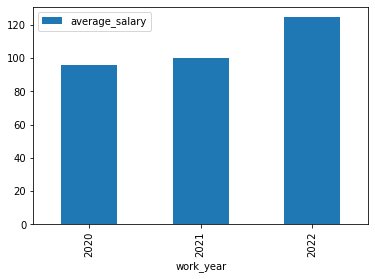

In [17]:
ax = df1.plot(kind = 'bar', x = 'work_year', y = 'average_salary', legend = True)

[Text(0, 0, '95.81K'), Text(0, 0, '99.85K'), Text(0, 0, '124.52K')]

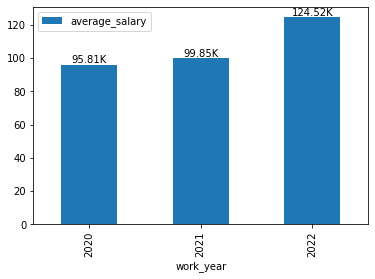

In [18]:
ax = df1.plot(kind = 'bar', x = 'work_year', y = 'average_salary', legend = True)
ax.bar_label(ax.containers[0], labels = df1['average_salary'].map('{:.2f}K'.format))


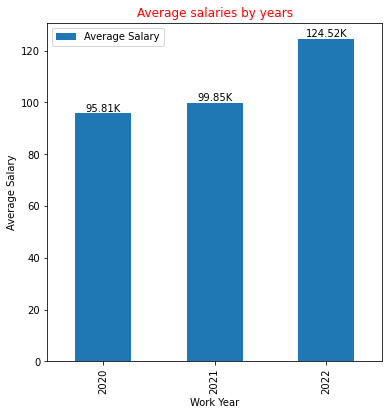

In [19]:
ax = df1.plot(kind = 'bar', x = 'work_year', y = 'average_salary', legend = True)
ax.bar_label(ax.containers[0], labels = df1['average_salary'].map('{:.2f}K'.format))
plt.subplots_adjust(top = 1.3)
ax.legend(['Average Salary'], loc = 'upper left')
plt.xlabel('Work Year')
plt.ylabel('Average Salary')
plt.title('Average salaries by years', color = 'red')
plt.show()

----------------------------------------------------------------

In [20]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,USD,150000,US,50,US,L


## **Remote Work Trends:**

Analysis delved into the prevalence of remote work positions within the dataset, categorizing employees based on their remote work status. By visualizing the distribution of remote positions, we gained insights into the evolving landscape of remote work and its impact on workforce dynamics.

In [21]:
df['remote_ratio']

0        0
1        0
2       50
3        0
4       50
      ... 
602    100
603    100
604      0
605    100
606    100
Name: remote_ratio, Length: 607, dtype: int64

In [22]:
df.remote_ratio

0        0
1        0
2       50
3        0
4       50
      ... 
602    100
603    100
604      0
605    100
606    100
Name: remote_ratio, Length: 607, dtype: int64

In [23]:
df.remote_ratio.unique()

array([  0,  50, 100], dtype=int64)

In [24]:
df2 = df.remote_ratio.value_counts()
df2
# This code calculates the frequency of each unique value in the 'remote_ratio' column of the DataFrame df and stores
# the counts in a new DataFrame named df2.

100    381
0      127
50      99
Name: remote_ratio, dtype: int64

In [25]:
df2.values

array([381, 127,  99], dtype=int64)

In [26]:
values = df2.to_list()
values

[381, 127, 99]

In [27]:
labels = ['Fully remote', 'No remote', 'Partially remote']

This code creates a bar plot showing the counts of employees in different remote work positions. It uses the predefined labels and values to represent 'Fully remote', 'No remote', and 'Partially remote' categories on the x-axis and their corresponding counts on the y-axis. The plot is adjusted to accommodate the title and displayed accordingly.

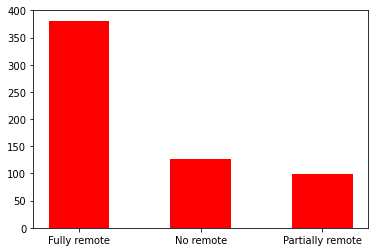

In [28]:
z = plt.bar(labels, values, width = 0.5, color = 'red')


[Text(0, 0, '381'), Text(0, 0, '127'), Text(0, 0, '99')]

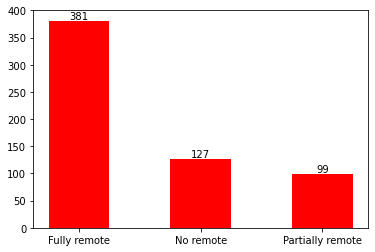

In [29]:
z = plt.bar(labels, values, width = 0.5, color = 'red')
plt.bar_label(z, labels = values)


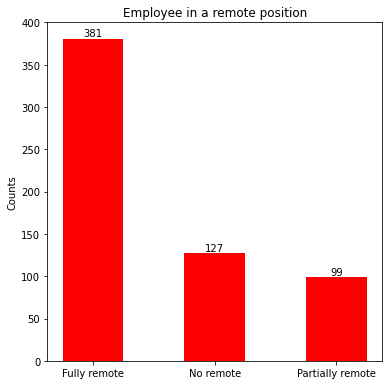

In [30]:
z = plt.bar(labels, values, width = 0.5, color = 'red')
plt.bar_label(z, labels = values)
plt.subplots_adjust(top = 1.3)
plt.title('Employee in a remote position')
plt.ylabel('Counts')
plt.show()

In [31]:
df.head(1)

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,EUR,79833,DE,0,DE,L


In [32]:
df.company_size.unique()

array(['L', 'S', 'M'], dtype=object)

## **Company Size Analysis:**

Further exploration focused on the distribution of company sizes within the dataset. By visualizing the distribution of companies based on their size categories, we gained insights into the composition of companies and their workforce sizes.

In [33]:
df3 = df.company_size.value_counts()
df3

M    326
L    198
S     83
Name: company_size, dtype: int64

In [34]:
df3.index.to_list()

['M', 'L', 'S']

In [35]:
values2 = df3.to_list()
values2

[326, 198, 83]

In [36]:
labels_for_company = ["Medium", "Large", "Small"]
labels_for_company

['Medium', 'Large', 'Small']

This code creates a pie chart to visualize the distribution of company sizes. It uses the values from the DataFrame df3 (stored in values2) as input for the pie chart. Labels for the company sizes are added as legends. The chart is configured to display percentages and shadows, and the aspect ratio is set to 'equal'. Finally, the title "Company Size" is added, and the plot is displayed.

([<matplotlib.patches.Wedge at 0x1aa27b04580>,
 [Text(-0.1278068772673044, 1.0925499540630534, ''),
  Text(-0.33883566866423465, -1.0465134445581008, ''),
  Text(1.0000569882359693, -0.4581331905465946, '')])

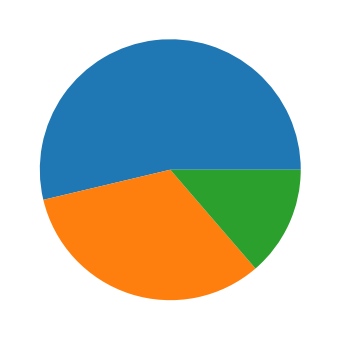

In [37]:
plt.figure(figsize = (13,6))
plt.pie(x = values2, labels = None)

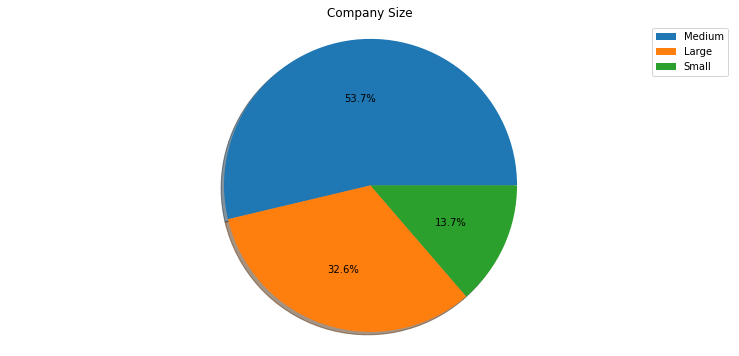

In [38]:
plt.figure(figsize = (13,6))
plt.pie(x = values2, labels = None, autopct = '%1.1f%%', shadow = True)
plt.legend(labels = labels_for_company, loc = 'upper right')
plt.axis('equal')
plt.title("Company Size")
plt.show()

In [39]:
df.head(3)

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,GBP,109024,GB,50,GB,M


## **Job Title Analysis:**

Analyzed the frequency of the top five unique job titles within the dataset, providing insights into the most common job roles. By visualizing the distribution of job titles, we gained insights into the diversity of roles and responsibilities within the workforce.

In [40]:
df.job_title.unique()

array(['Data Scientist', 'Machine Learning Scientist',
       'Big Data Engineer', 'Product Data Analyst',
       'Machine Learning Engineer', 'Data Analyst', 'Lead Data Scientist',
       'Business Data Analyst', 'Lead Data Engineer', 'Lead Data Analyst',
       'Data Engineer', 'Data Science Consultant', 'BI Data Analyst',
       'Director of Data Science', 'Research Scientist',
       'Machine Learning Manager', 'Data Engineering Manager',
       'Machine Learning Infrastructure Engineer', 'ML Engineer',
       'AI Scientist', 'Computer Vision Engineer',
       'Principal Data Scientist', 'Data Science Manager', 'Head of Data',
       '3D Computer Vision Researcher', 'Data Analytics Engineer',
       'Applied Data Scientist', 'Marketing Data Analyst',
       'Cloud Data Engineer', 'Financial Data Analyst',
       'Computer Vision Software Engineer',
       'Director of Data Engineering', 'Data Science Engineer',
       'Principal Data Engineer', 'Machine Learning Developer',
       

In [41]:
df.job_title.value_counts()

Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                            

In [42]:
df4 = df.job_title.value_counts().head()
df4

Data Scientist               143
Data Engineer                132
Data Analyst                  97
Machine Learning Engineer     41
Research Scientist            16
Name: job_title, dtype: int64


This code creates a bar plot to visualize the frequency of the top five job titles. It utilizes seaborn's barplot function, with the job titles on the x-axis and their corresponding counts on the y-axis. The plot is styled with the "viridis" color palette. Additional formatting includes a title, axis labels, and rotation of the x-axis labels for better readability. Finally, the plot is displayed.

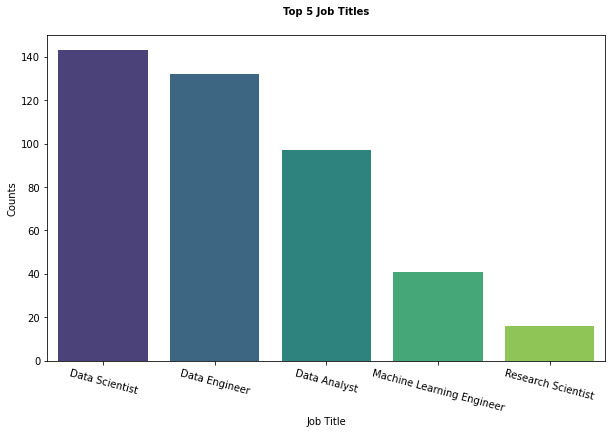

In [43]:
plt.figure(figsize = (10,6))
# plt.bar(x = df4.index, height= df4.values)
sns.barplot(x = df4.index, y = df4.values, palette= "viridis")
plt.title('Top 5 Job Titles', fontweight = 'bold', fontsize = 10, pad = 20)
plt.ylabel('Counts')
plt.xlabel('Job Title')
plt.xticks(rotation = -15)
plt.show()

In [44]:
df.head(3)

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,GBP,109024,GB,50,GB,M


## **Salary Distribution by Company Size:**

Analysis investigated the distribution of salaries across different company sizes, providing insights into how salary scales vary based on the size of the company. By visualizing the distribution of salaries, we gained insights into salary trends and disparities across different company sizes.

In [45]:
df5 = df[["salary_in_usd", "company_size"]]
df5

,salary_in_usd,company_size
0,79833,L
1,260000,S
2,109024,M
3,20000,S
4,150000,L
...,...,...
602,154000,M
603,126000,M
604,129000,M
605,150000,M


This code segregates the DataFrame df5 into three separate DataFrames based on company size: 'S' (Small), 'M' (Medium), and 'L' (Large). Then, it calculates the mean salary in USD for each company size category. Finally, it stores the company size labels ('Small', 'Medium', 'Large') and their corresponding mean salaries in the lists labels and sal_mean, respectively.

In [46]:
S = df5[df5['company_size'] == 'S']
S

,salary_in_usd,company_size
1,260000,S
3,20000,S
6,190000,S
9,125000,S
10,51321,S
...,...,...
510,150000,S
512,65000,S
513,71444,S
515,48000,S


In [47]:
M = df5[df5['company_size'] == 'M']
M

,salary_in_usd,company_size
2,109024,M
12,39916,M
18,5707,M
19,56000,M
20,43331,M
...,...,...
601,52000,M
602,154000,M
603,126000,M
604,129000,M


In [48]:
L = df5[df5['company_size'] == "L"]
L

,salary_in_usd,company_size
0,79833,L
4,150000,L
5,72000,L
7,35735,L
8,135000,L
...,...,...
524,135000,L
525,177000,L
550,205300,L
551,140400,L


In [49]:
S['salary_in_usd'].mean()

77632.67469879518

In [50]:
 M["salary_in_usd"].mean()

116905.46625766871

In [51]:
 L["salary_in_usd"].mean()

119242.99494949495

In [52]:
S = df5[df5['company_size'] == 'S']
M = df5[df5['company_size'] == 'M']
L = df5[df5['company_size'] == "L"]

labels = ['Small','Medium', 'Large']
sal_mean = [S['salary_in_usd'].mean(), M["salary_in_usd"].mean(), L["salary_in_usd"].mean()]
sal_mean

[77632.67469879518, 116905.46625766871, 119242.99494949495]

This code converts the mean salary values in the list sal_mean from USD to thousands and rounds them to two decimal places. Then, it converts each value to a string with 'K' (thousands) appended to denote the unit. The result is stored in the list label_change.

In [53]:
np.round([x/1000 for x in sal_mean], 2)

array([ 77.63, 116.91, 119.24])

# **-------------------------------------------------------------------**

In [54]:
print(map(int, '34'))

In [55]:
le = list(map(int, '34'))
le

[3, 4]

In [56]:
tuple(map(int,'2'))

(2,)

In [57]:
# Double all numbers using map and lambda
 
numbers = (1, 2, 3, 4)
result = map(lambda x: x + x, numbers)
print(list(result))

[2, 4, 6, 8]


In [58]:
label_change = np.round([x/1000 for x in sal_mean], 2)
label_change = list(map(str, label_change))
label_change = [x + ' K' for x in label_change]
label_change


['77.63 K', '116.91 K', '119.24 K']

This code creates a bar plot to visualize the distribution of salaries by company size. It uses the mean salary values (sal_mean) for each company size category (labels). The bar labels are updated with the mean salaries in thousands. 

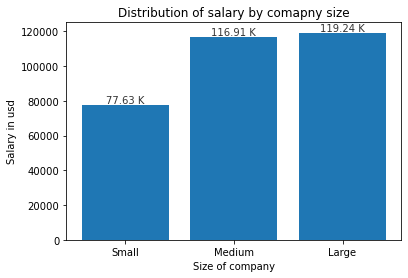

In [59]:
z = plt.bar(labels, sal_mean)
plt.bar_label(z,label_change, alpha = 0.8)
plt.title('Distribution of salary by comapny size')
plt.xlabel('Size of company')
plt.ylabel('Salary in usd')
plt.show()

This code creates overlaid histograms to visualize the distribution of salaries for companies of different sizes. Each histogram represents a different company size category ('Small', 'Medium', 'Large'), with kernel density estimation (KDE) curves plotted alongside.

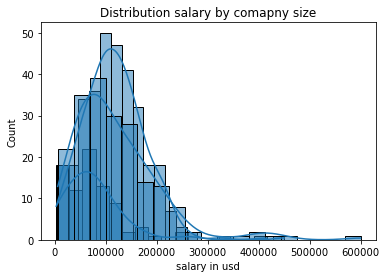

In [60]:
sns.histplot(S['salary_in_usd'], label = 'Small', kde = True)
sns.histplot(M['salary_in_usd'], label = 'Medium', kde = True)
sns.histplot(L['salary_in_usd'], label = 'Large', kde = True)
plt.title('Distribution salary by comapny size')
plt.xlabel('salary in usd')
plt.show()

## -------------------------------------------------------------------

In [61]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,USD,150000,US,50,US,L


## **Experience Level Distribution:**

Lastly, explored the distribution of experience levels within the dataset, providing insights into the composition of workforce experience across different levels. By visualizing the distribution of experience levels, we gained insights into the career progression and experience diversity within the workforce.

In [62]:
df6 = df.experience_level.value_counts()
df6

SE    280
MI    213
EN     88
EX     26
Name: experience_level, dtype: int64

In [63]:
df6.index.to_list()

['SE', 'MI', 'EN', 'EX']

'SE' is mapped to 'Senior'

'MI' is mapped to 'Middle'

'EN' is mapped to 'Entry Level'

'EX' is mapped to 'Executive'

In [69]:
exp_mp = {
    'SE' : 'Senior',
    'MI' : 'Middle',
    'EN' : 'Entry Level',
    'EX' : 'Executive'
}

In [70]:
df['experience_level'].replace(exp_mp, inplace = True)

In [71]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Middle,FT,Data Scientist,EUR,79833,DE,0,DE,L
1,2020,Senior,FT,Machine Learning Scientist,USD,260000,JP,0,JP,S
2,2020,Senior,FT,Big Data Engineer,GBP,109024,GB,50,GB,M
3,2020,Middle,FT,Product Data Analyst,USD,20000,HN,0,HN,S
4,2020,Senior,FT,Machine Learning Engineer,USD,150000,US,50,US,L


In [72]:
df['experience_level'].unique()

array(['Middle', 'Senior', 'Entry Level', 'Executive'], dtype=object)

In [73]:
df6 = df.experience_level.value_counts()
df6

Senior         280
Middle         213
Entry Level     88
Executive       26
Name: experience_level, dtype: int64

In [74]:
labels = df6.index.to_list()
labels

['Senior', 'Middle', 'Entry Level', 'Executive']

In [75]:
values = df6.values
values

array([280, 213,  88,  26], dtype=int64)

This code creates a pie chart to visualize the distribution of experience levels. It uses the values from the DataFrame df6 (stored in values) as input for the pie chart and the labels defined earlier (labels) for the corresponding categories. The chart displays percentages, shadows, and a title before being shown.

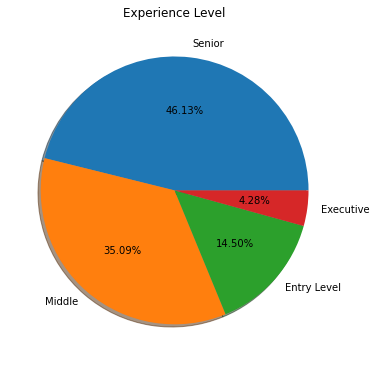

In [76]:
plt.figure(figsize = (6,12))
plt.pie(x = values, labels = labels, autopct = '%1.2f%%', shadow = True)
plt.title("Experience Level")
plt.show()

## **Conclusion:**

In conclusion, this data analysis project offered a comprehensive exploration of workforce dynamics, salary trends, and experience levels within the dataset. The insights gained from this analysis can inform strategic decision-making processes, career planning strategies, and workforce management initiatives.